In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn import linear_model
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Dataset

df = pd.read_csv("/Users/elijahwoolford/Desktop/python /countries of the world.csv")
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


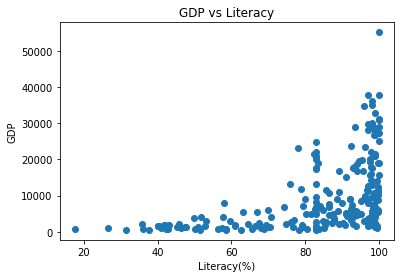

In [3]:
#Cleaning and plotting features 
df["Literacy (%)"] = df["Literacy (%)"].apply(lambda x: float(re.sub(",", ".", str(x))))
df["Literacy (%)"] = df["Literacy (%)"].fillna(df["Literacy (%)"].mean())

df["GDP ($ per capita)"] = df["GDP ($ per capita)"].apply(lambda x: float(re.sub("NaN", df["GDP ($ per capita)"].mean(), str(x)))) 
df["GDP ($ per capita)"][223] = df["GDP ($ per capita)"].mean()

plt.scatter(x=df["Literacy (%)"], y=df["GDP ($ per capita)"])
plt.xlabel("Literacy(%)")
plt.ylabel("GDP")
plt.title("GDP vs Literacy")
plt.show()

In [4]:
#Check and remove the outlier

x = df["GDP ($ per capita)"].sort_values(ascending=False)
print(x.head())

df = df.drop(df.index[121])
y = df["GDP ($ per capita)"].sort_values(ascending=False)
y.head()

121    55100.0
154    37800.0
214    37800.0
22     36000.0
38     35000.0
Name: GDP ($ per capita), dtype: float64


154    37800.0
214    37800.0
22     36000.0
38     35000.0
177    34600.0
Name: GDP ($ per capita), dtype: float64

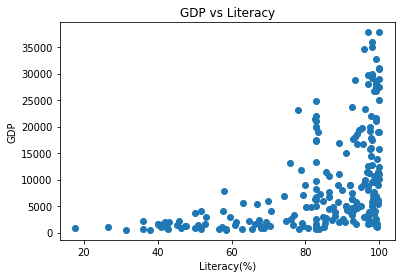

In [5]:
# Plot without the outlier

plt.scatter(x=df["Literacy (%)"], y=df["GDP ($ per capita)"])
plt.xlabel("Literacy(%)")
plt.ylabel("GDP")
plt.title("GDP vs Literacy")
plt.show()

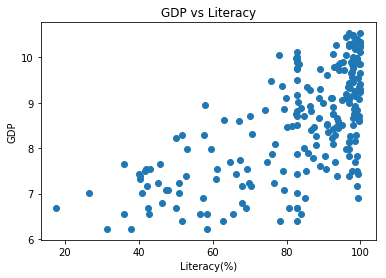

In [6]:
#Normalize the data

plt.scatter(x=df["Literacy (%)"], y=np.log(df["GDP ($ per capita)"]))
plt.xlabel("Literacy(%)")
plt.ylabel("GDP")
plt.title("GDP vs Literacy")
plt.show()

In [7]:
scaler = MinMaxScaler()
lit = scaler.fit_transform(df["Literacy (%)"].reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(lit, df["GDP ($ per capita)"] , test_size=0.4, random_state=0)

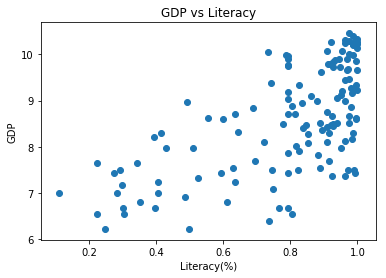

In [8]:
plt.scatter(x=X_train, y=np.log(y_train))
plt.xlabel("Literacy(%)")
plt.ylabel("GDP")
plt.title("GDP vs Literacy")
plt.show()

Coefficients: 
 [3.22152865]
Intercept: 
 6.03092889983919


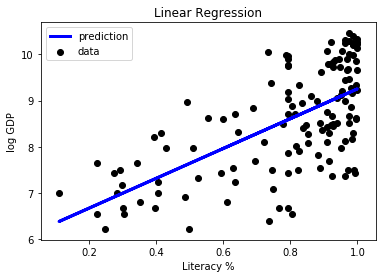

In [9]:
# Linear Regression

X = X_train
Y = np.log(y_train)

reg = linear_model.LinearRegression()
reg.fit(X,Y)

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

plt.scatter(X, Y, color='black', label="data")
plt.title("Linear Regression")
plt.xlabel("Literacy %")
plt.ylabel("log GDP")
plt.plot(X, reg.predict(X), color='blue', linewidth=3, label="prediction")
plt.legend()
plt.show()


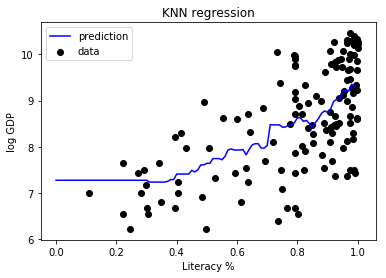

In [10]:
#KNN regression unweighted

X = X_train
Y = np.log(y_train)

knn = neighbors.KNeighborsRegressor(n_neighbors=20)
knn.fit(X,Y)

T = np.arange(0, 1, 0.01)[:, np.newaxis]
Pred = knn.predict(T)

plt.scatter(X, Y, color="black", label='data')
plt.plot(T, Pred, color="blue", label='prediction')
plt.xlabel("Literacy %")
plt.ylabel("log GDP")
plt.title("KNN regression")
plt.legend()
plt.show()

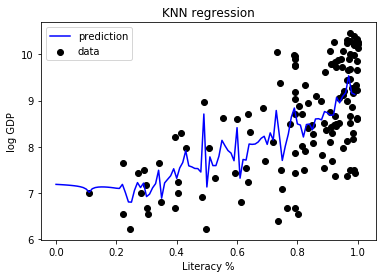

In [11]:
#KNN regression weighted

X = X_train
Y = np.log(y_train)

knn_w = neighbors.KNeighborsRegressor(n_neighbors=20, weights="distance")
knn_w.fit(X,Y)

T = np.arange(0, 1, 0.01)[:, np.newaxis]
Pred = knn_w.predict(T)

plt.scatter(X, Y, color="black", label='data')
plt.plot(T, Pred, color="blue", label='prediction')
plt.xlabel("Literacy %")
plt.ylabel("log GDP")
plt.title("KNN regression")
plt.legend()
plt.show()

In [12]:
lin_score = cross_val_score(reg, X_test, y_test, cv=5)
knn_score = cross_val_score(knn, X_test, y_test ,cv=5)
knn_w_score = cross_val_score(knn_w, X_test, y_test ,cv=5)

print("Linear Regression Score: \n", lin_score.mean(), "\n +/-:", lin_score.std()*2)
print("KNN unweighted Regression Score: \n", knn_score.mean(), "\n +/-:", knn_score.std()*2)
print("KNN weighted Regression Score: \n", knn_w_score.mean(), "\n +/-:", knn_w_score.std()*2)

Linear Regression Score: 
 0.23445785156647458 
 +/-: 0.21503706242911685
KNN unweighted Regression Score: 
 0.1887766382441219 
 +/-: 0.41330802135652167
KNN weighted Regression Score: 
 0.14891437218079745 
 +/-: 0.516742211263209


Using the data from various countries around the world, I decided to see if we could build an effective model predicting country GDP from country literacy rate. Plotting the initial data we see a logarithmic relationship between these two variables. Also, we notice that 100% literacy rate doesn't necessarily mean that the country will have a high or low GDP. I feel like this is important in evaluation of the overall model.

Based on the r2 scores we see that none of these models are particularly good. All have scores below 0.25 and don't seem to predict the GDP correctly. Judging from this we can accuratly say that literacy rate on its own is not a good predictor of GDP. Adding more features/variables to this model should see accuracy and predictability increase. Population, region, and net migration are some that may improve these models drastically.